# Import Tools

In [1]:
import csv
import time
import random
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Read Data

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
print(f"Shape of dataset:\n{data.shape}")

Shape of dataset:
(768, 9)


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
attributes = data.columns.drop('Outcome')
attributes

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing Data

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data[['Glucose', 'BloodPressure', 
      'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 
                                                  'SkinThickness', 'Insulin', 
                                                  'BMI']].replace(0, np.NaN)

In [11]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

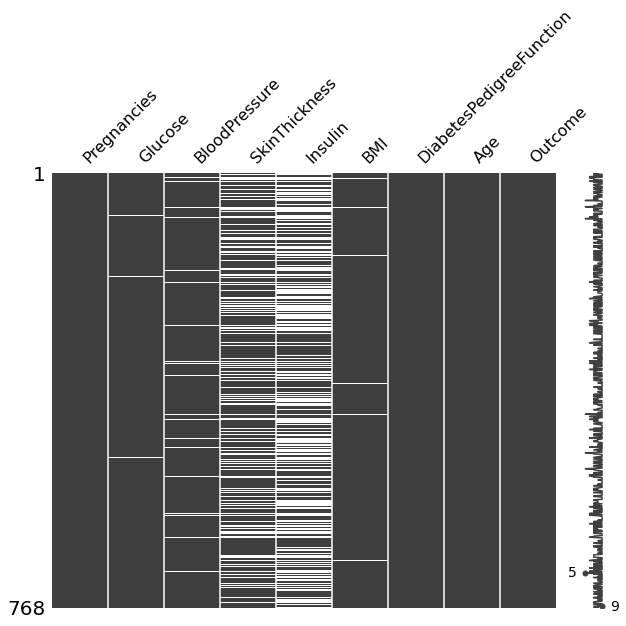

In [12]:
missingno.matrix(data,figsize=(10,8))
plt.show()

In [13]:
scaler = RobustScaler()
data2 = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
imputer = KNNImputer(n_neighbors=15)
data2 = pd.DataFrame(imputer.fit_transform(data2), columns=data2.columns)
data = pd.DataFrame(scaler.inverse_transform(data2), columns=data2.columns)

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.663368,72.361719,29.032465,152.865104,32.419800,0.471876,33.240885,0.348958
std,3.369578,30.494486,12.153338,9.295300,93.979254,6.886692,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,90.633333,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,134.966667,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,34.950000,187.833333,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Analyze Attribute Behaviour

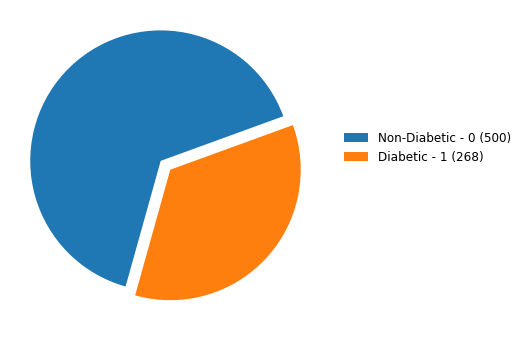

In [16]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))
labels = data.Outcome.value_counts()
plt.pie(labels, explode = [0.1, 0], startangle=20)
labels = [f'Non-Diabetic - 0 ({labels[0]})', f'Diabetic - 1 ({labels[1]})']
ax.legend(labels=labels, frameon=False, bbox_to_anchor=(1, 0.65), fontsize=12)
plt.savefig('target_count.png')
plt.show()

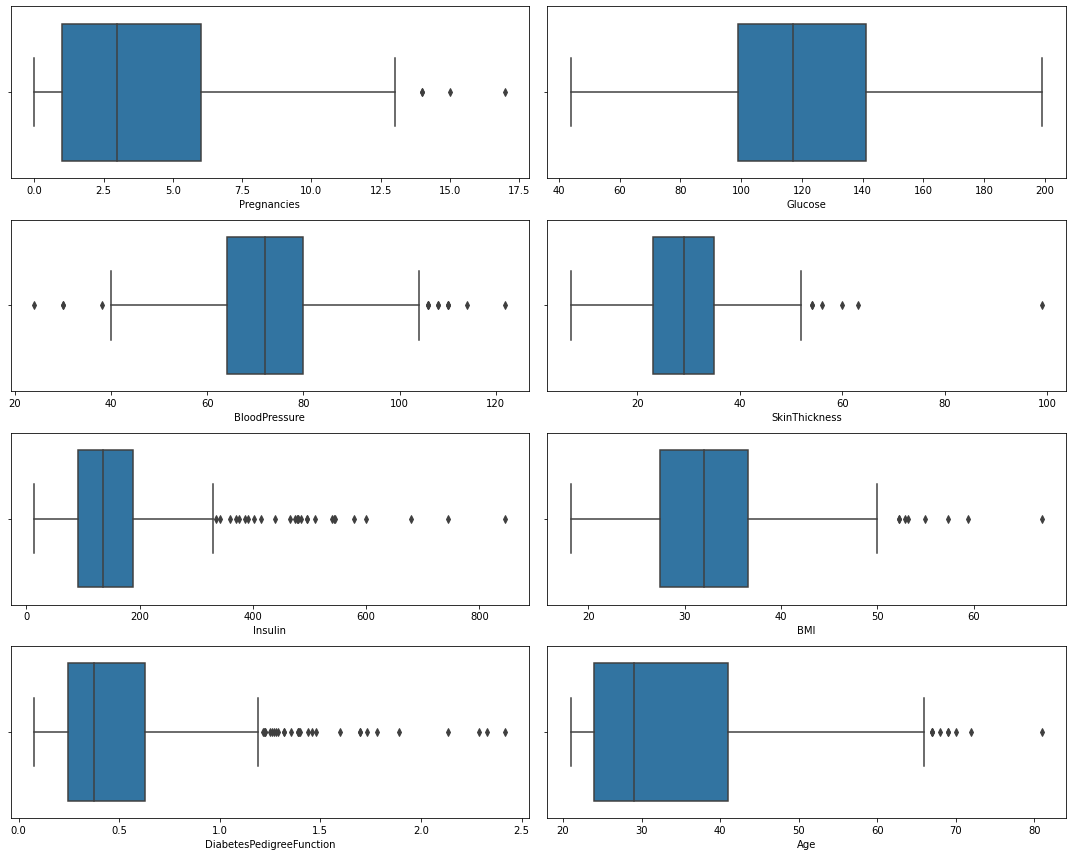

In [17]:
def attr_box_plot(df, columns, hue):
    nc = ceil(len(columns)/2)
    fig, ax = plt.subplots(nc, 2, figsize = (15, 12))
    for idx, column in enumerate(columns):
        sns.boxplot(x= df[column], ax = ax[int(idx/2),idx%2])
    plt.tight_layout()
    plt.savefig('attr_box_plot.png')
attr_box_plot(data, attributes, 'is_patient')

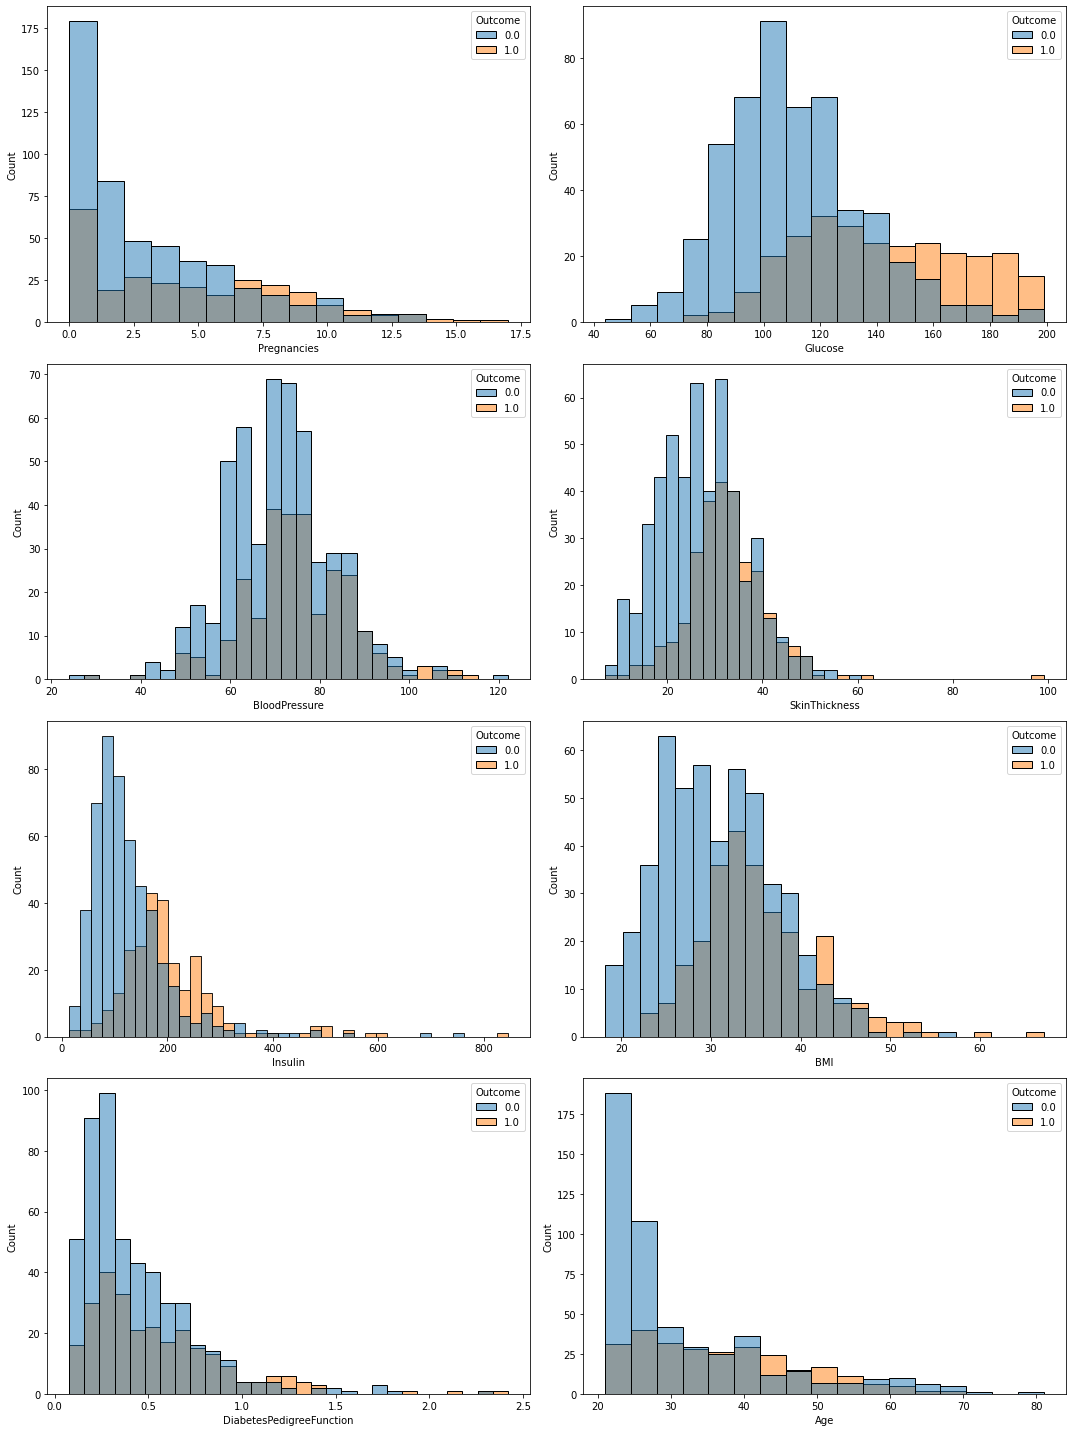

In [18]:
def attr_hist_plot(df, columns, hue):
    nc = ceil(len(columns)/2)
    fig, ax = plt.subplots(nc, 2, figsize = (15, 20))
    for idx, column in enumerate(columns):
        sns.histplot(df, x=column, hue=hue, ax = ax[int(idx/2),idx%2])
    plt.tight_layout()
    plt.savefig('attr_hist_plot.png')
attr_hist_plot(data, attributes, 'Outcome')

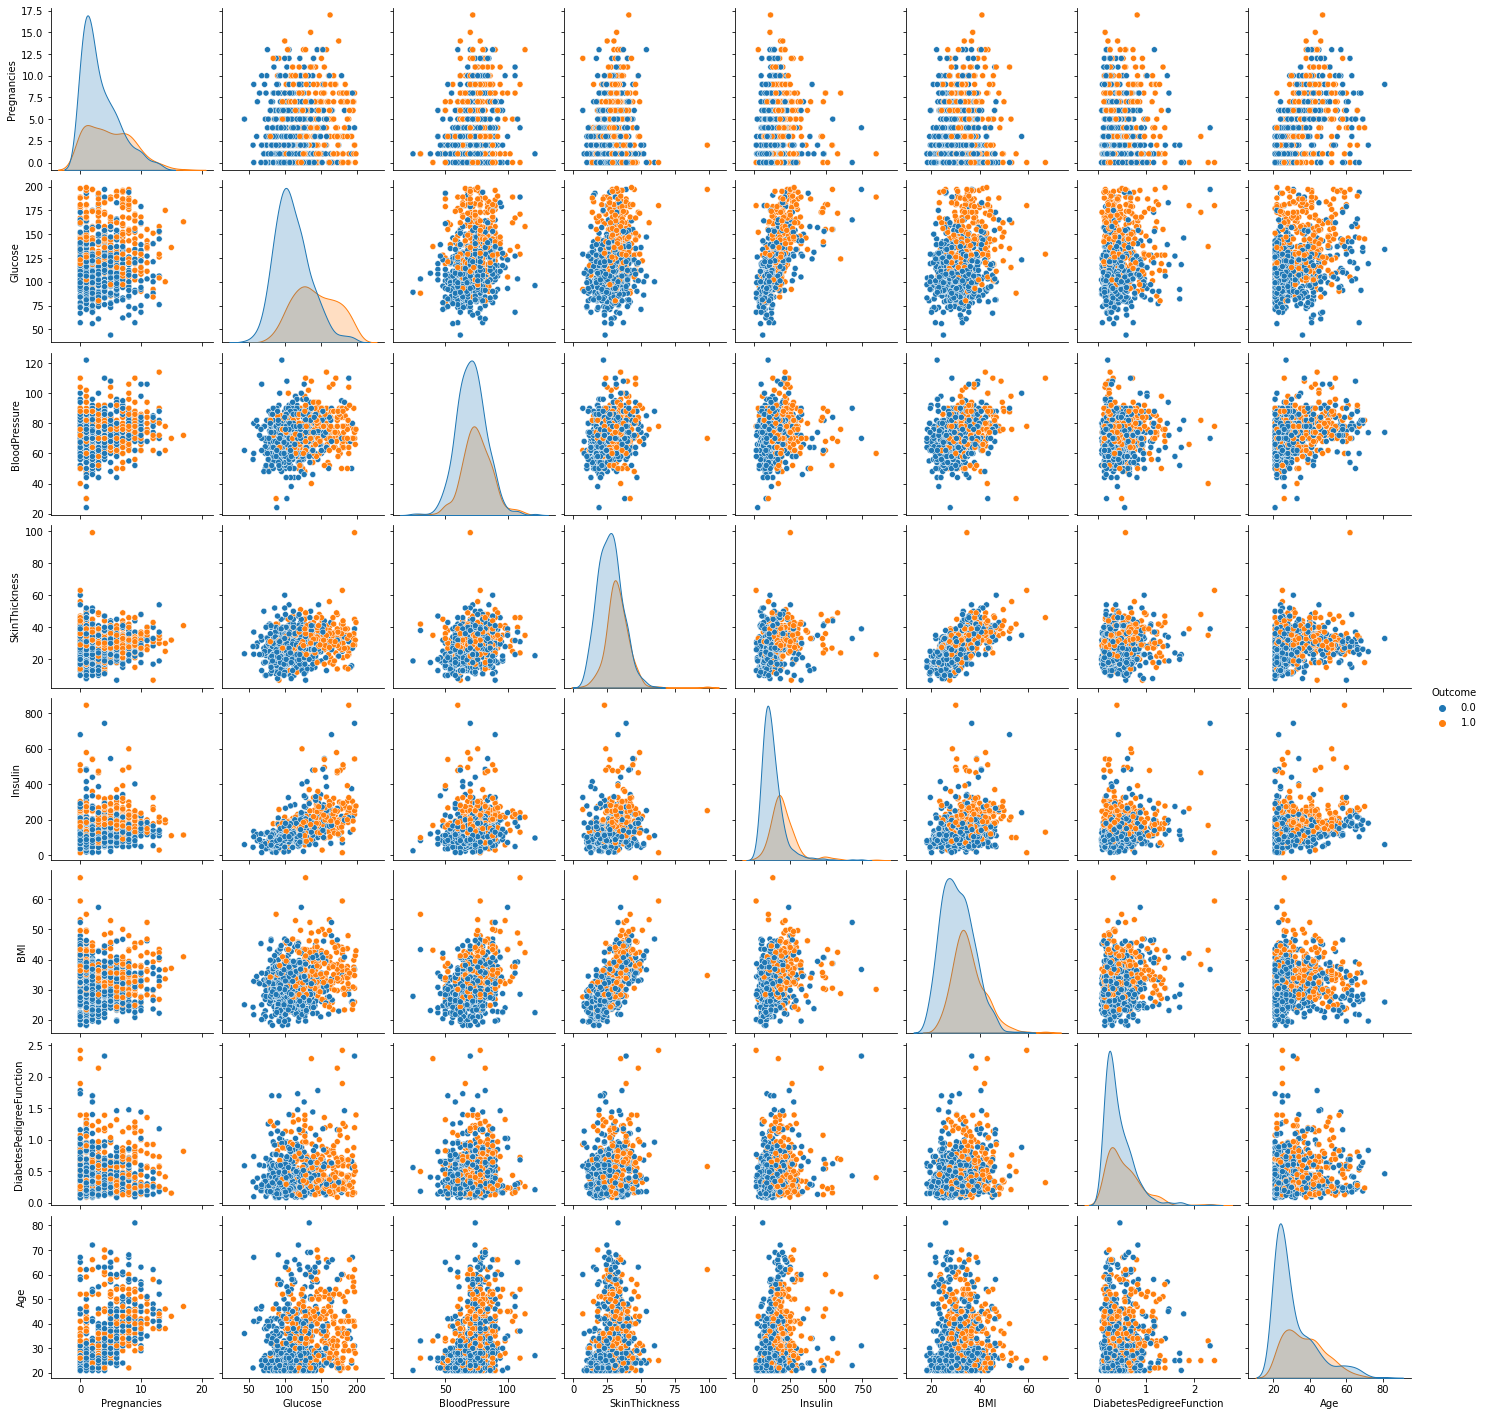

In [19]:
sns.pairplot(data, hue='Outcome')
plt.savefig('pairplot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


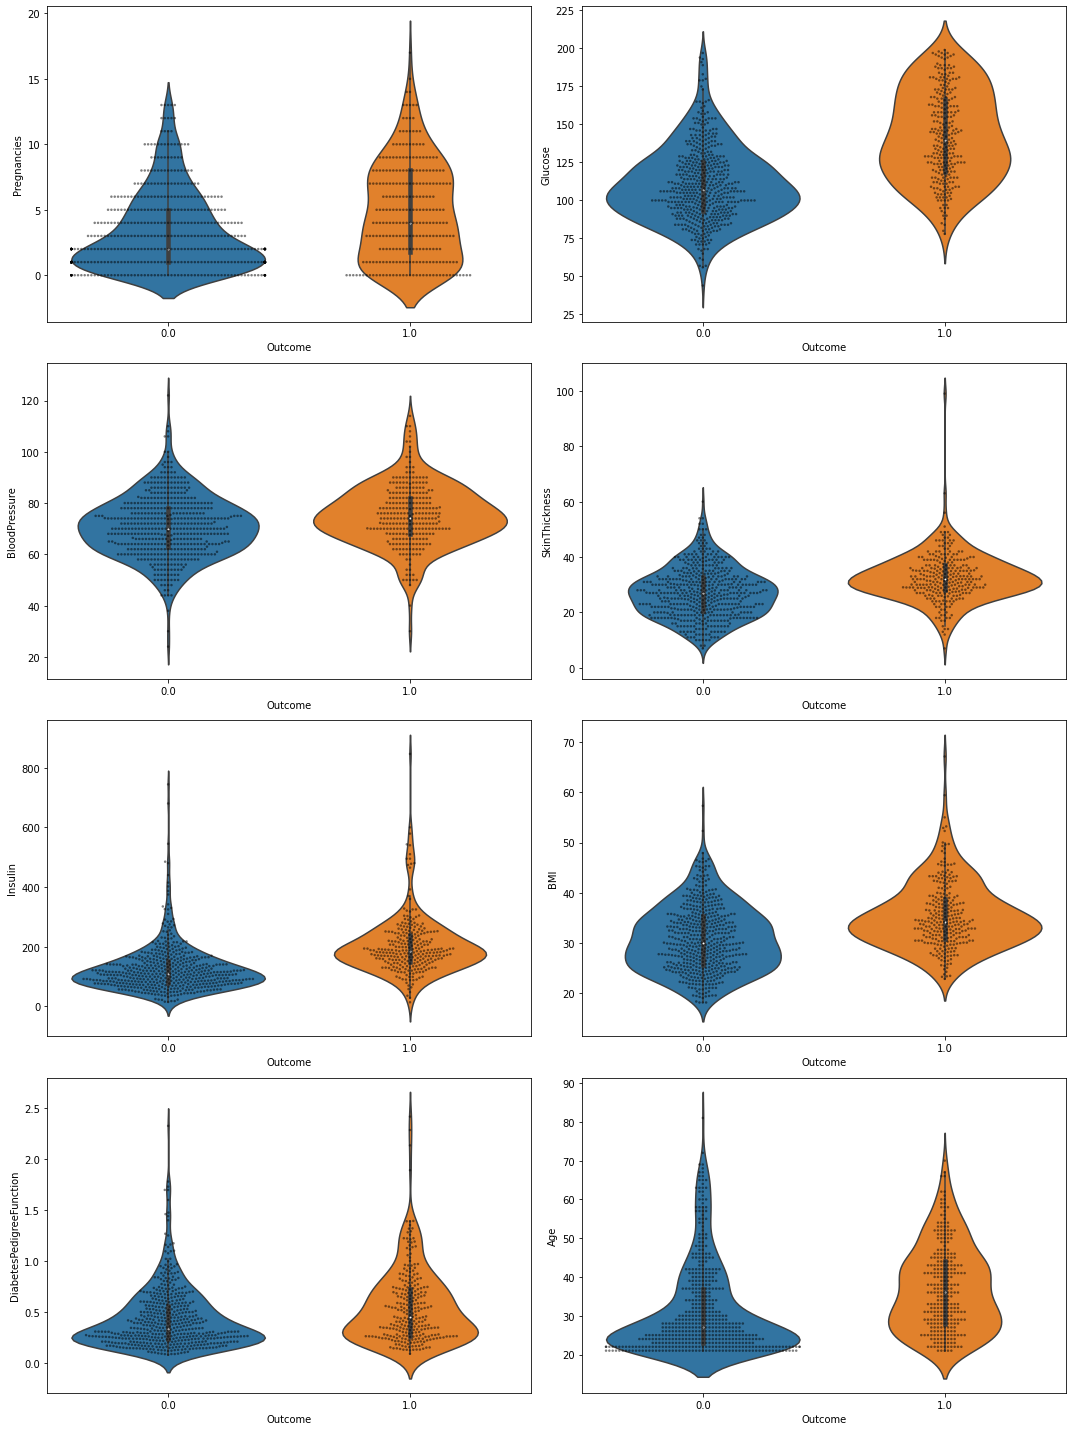

In [20]:
def attr_violin_swarm_plot(df, columns, hue):
    nc = ceil(len(columns)/2)
    fig, ax = plt.subplots(nc, 2, figsize = (15, 20))
    for idx, column in enumerate(columns):
        sns.violinplot(x=hue, y=column,
                       data=data, ax = ax[int(idx/2),idx%2])
        sns.swarmplot(x=hue, y=column, data=data,
                      size=2.5, color='k', alpha=0.5, ax = ax[int(idx/2),idx%2])
    plt.tight_layout()
    plt.savefig('violin_swarm_plot.png')

attr_violin_swarm_plot(data, attributes, 'Outcome')

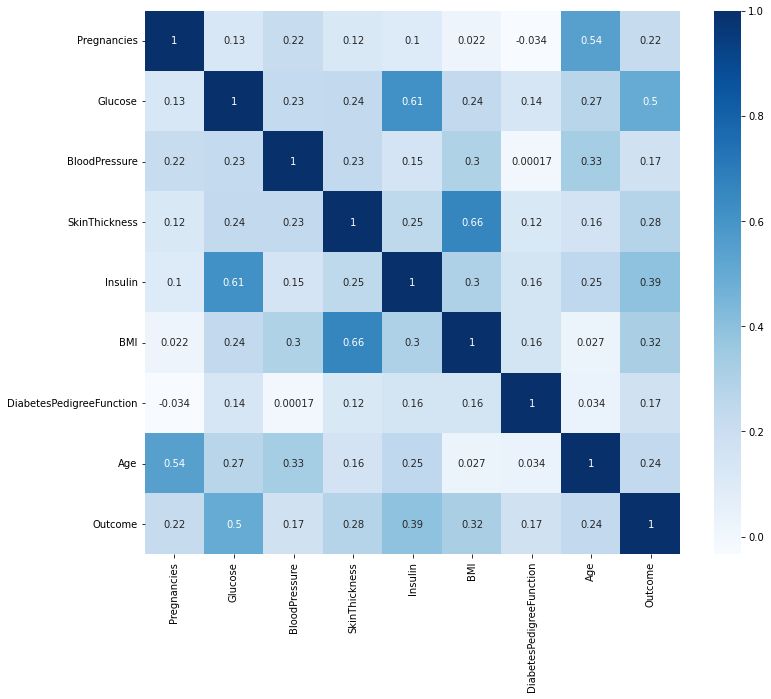

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),cmap=plt.cm.Blues, annot=True)
plt.savefig('heatmap.png')
plt.show()

# SVM

In [22]:
def classifier(kernel, gamma, C, degree, X_train, y_train, X_val, y_val):
    svc = SVC(kernel=kernel, gamma=gamma, C=C, degree=degree)
    svc.fit(X_train, y_train)
    y_pred_val = svc.predict(X_val)
    acc = round(100 * accuracy_score(y_val, y_pred_val), 5)
    return svc, acc

# Prepare Dataset

In [23]:
df = data

In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
sc = RobustScaler()
X = sc.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=True)

In [27]:
print(f'Shape: {X_train.shape}')
print(f'Shape: {X_val.shape}')
print(f'Shape: {X_test.shape}')

Shape: (537, 8)
Shape: (77, 8)
Shape: (154, 8)


# Hyperparameters

In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [29]:
gammas = ['auto', 'scale']

In [30]:
cs = [100, 10, 1, 0.1]

In [31]:
degrees = [6, 5, 4, 3, 2, 1, 0]

# Q2

In [32]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

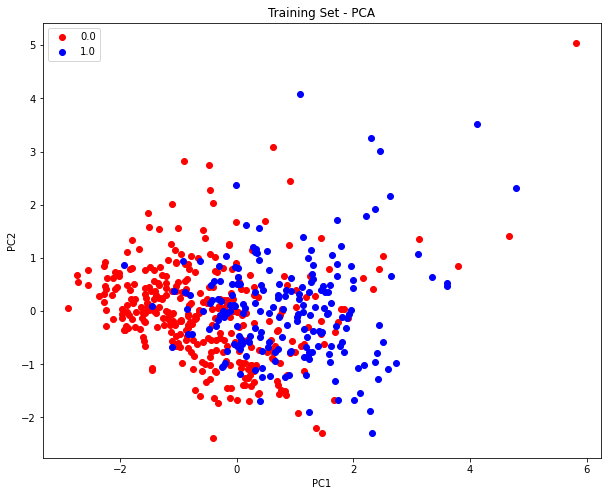

In [33]:
plt.figure(figsize=(10, 8))
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train_pca[y_train == j, 0], 
                X_train_pca[y_train == j, 1],
                c = ['red', 'blue'][i], label = j)
plt.title('Training Set - PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('pca_train')
plt.show()

# Q3

In [34]:
best_acc_pca = 0
best_svc_pca = None

lst_pca = []

for i in kernels:
    for j in gammas:
        for k in cs:
            if i != 'poly':
                start = time.time()
                svc, acc = classifier(i, j, k, 3,
                                      X_train_pca, y_train, X_val_pca, y_val)
                end = time.time()
                dct = {}
                dct['Kernel'] = i
                dct['Gamma'] = j
                dct['C'] = k
                dct['Degree'] = 3
                dct['Val Accuracy'] = acc
                dct['Time Taken (s)'] = round(end-start, 3)
                lst_pca.append(dct)
                if best_acc_pca <= acc:
                    best_acc_pca = acc
                    best_svc_pca = svc
            else:
                for l in degrees:
                    if (k == 100 and l <= 4) or (k==10 and l <= 5) or (k < 10):
                        start = time.time()
                        svc, acc = classifier(i, j, k, l,
                                              X_train_pca, y_train, X_val_pca, y_val)
                        end = time.time()
                        dct = {}
                        dct['Kernel'] = i
                        dct['Gamma'] = j
                        dct['C'] = k
                        dct['Degree'] = l
                        dct['Val Accuracy'] = acc
                        dct['Time Taken (s)'] = round(end-start, 3)
                        lst_pca.append(dct)
                        if best_acc_pca <= acc:
                            best_acc_pca = acc
                            best_svc_pca = svc

In [35]:
pca_accs = pd.DataFrame(lst_pca)
pd.set_option('display.max_rows', None)
pca_accs.to_csv('PCA_Accuracies.csv', index = False)
pca_accs

,Kernel,Gamma,C,Degree,Val Accuracy,Time Taken (s)
0,linear,auto,100.0,3,77.92208,0.050
1,linear,auto,10.0,3,77.92208,0.010
2,linear,auto,1.0,3,77.92208,0.005
3,linear,auto,0.1,3,77.92208,0.004
4,linear,scale,100.0,3,77.92208,0.045
5,linear,scale,10.0,3,77.92208,0.010
6,linear,scale,1.0,3,77.92208,0.005
7,linear,scale,0.1,3,77.92208,0.004
8,poly,auto,100.0,4,70.12987,41.923
9,poly,auto,100.0,3,76.62338,2.396


In [36]:
best_svc_pca

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
print(f'Validation Accuracy: {best_acc_pca}')

Validation Accuracy: 79.22078


In [38]:
y_pred_test_pca = best_svc_pca.predict(X_test_pca)

In [39]:
acc_pca = round(100 * accuracy_score(y_test, y_pred_test_pca), 5)
print(f'Test Accuracy: {acc_pca}')

Test Accuracy: 78.57143


In [40]:
cm_pca = confusion_matrix(y_test, y_pred_test_pca)
print(cm_pca)

[[90 14]
 [19 31]]


In [41]:
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Y12 = best_svc_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

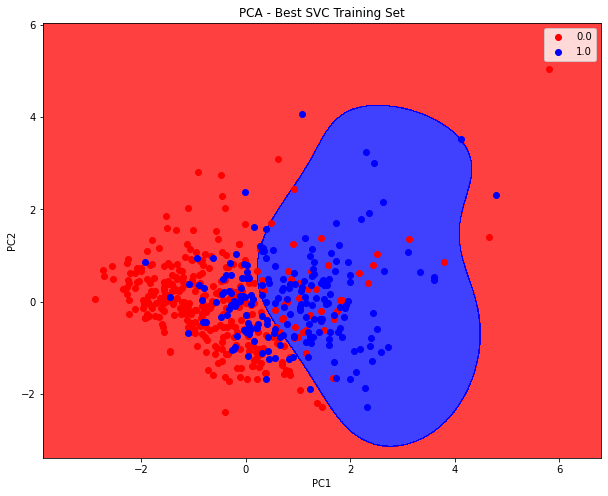

In [42]:
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, Y12, alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA - Best SVC Training Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('pca_best_svc_train')
plt.show()

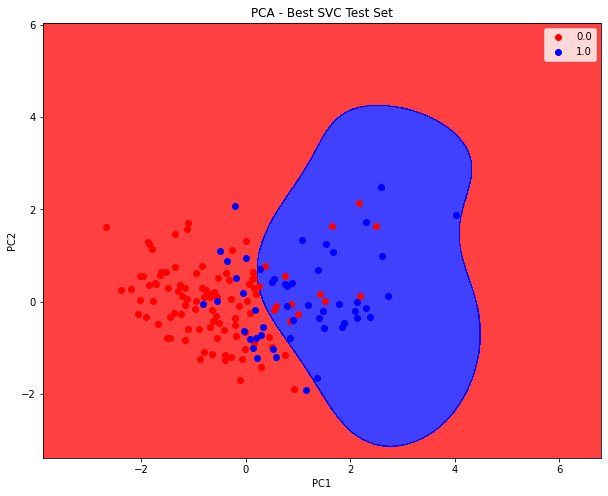

In [43]:
X_set, y_set = X_test_pca, y_test

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, Y12, alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA - Best SVC Test Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('pca_best_svc_test')
plt.show()

# Q4

In [44]:
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

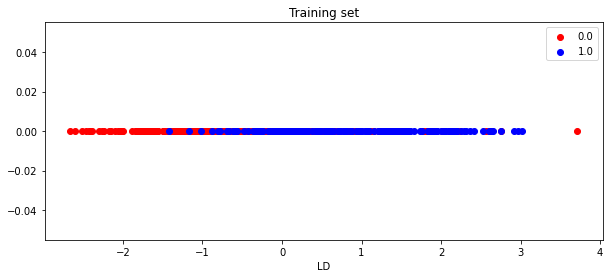

In [45]:
plt.figure(figsize=(10, 4))
for i, j in enumerate(np.unique(y_train)):
    x_plt = X_train_lda[y_train == j, 0]
    y_plt = np.zeros_like(x_plt)
    plt.scatter(x_plt, y_plt, c = ['red', 'blue'][i], label = j)
plt.title('Training set')
plt.xlabel('LD')
plt.legend()
plt.savefig('lda_train_1')
plt.show()

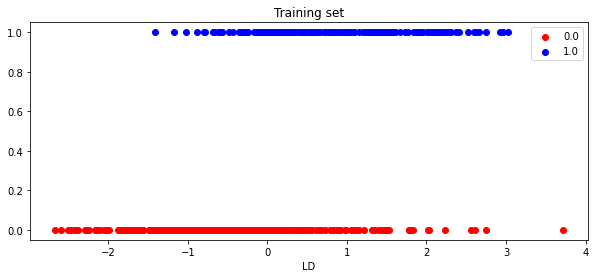

In [46]:
plt.figure(figsize=(10, 4))
for i, j in enumerate(np.unique(y_train)):
    x_plt = X_train_lda[y_train == j, 0]
    y_plt = np.zeros_like(x_plt) + j
    plt.scatter(x_plt, y_plt, c = ['red', 'blue'][i], label = j)
plt.title('Training set')
plt.xlabel('LD')
plt.legend()
plt.savefig('lda_train_2')
plt.show()

# Q5

In [47]:
best_acc_lda = 0
best_svc_lda = None

lst_lda = []

for i in kernels:
    for j in gammas:
        for k in cs:
            if i != 'poly':
                start = time.time()
                svc, acc = classifier(i, j, k, 3,
                                      X_train_lda, y_train, X_val_lda, y_val)
                end = time.time()
                dct = {}
                dct['Kernel'] = i
                dct['Gamma'] = j
                dct['C'] = k
                dct['Degree'] = 3
                dct['Val Accuracy'] = acc
                dct['Time Taken (s)'] = round(end-start, 3)
                lst_lda.append(dct)
                if best_acc_lda <= acc:
                    best_acc_lda = acc
                    best_svc_lda = svc
            else:
                for l in degrees:
                    if (k == 100 and l <= 4) or (k==10 and l <= 5) or (k < 10):
                        start = time.time()
                        svc, acc = classifier(i, j, k, l,
                                              X_train_lda, y_train, X_val_lda, y_val)
                        end = time.time()
                        dct = {}
                        dct['Kernel'] = i
                        dct['Gamma'] = j
                        dct['C'] = k
                        dct['Degree'] = l
                        dct['Val Accuracy'] = acc
                        dct['Time Taken (s)'] = round(end-start, 3)
                        lst_lda.append(dct)
                        if best_acc_lda <= acc:
                            best_acc_lda = acc
                            best_svc_lda = svc

In [48]:
lda_accs = pd.DataFrame(lst_lda)
pd.set_option('display.max_rows', None)
lda_accs.to_csv('LDA_Accuracies.csv', index = False)
lda_accs

,Kernel,Gamma,C,Degree,Val Accuracy,Time Taken (s)
0,linear,auto,100.0,3,80.51948,0.022
1,linear,auto,10.0,3,80.51948,0.006
2,linear,auto,1.0,3,80.51948,0.003
3,linear,auto,0.1,3,80.51948,0.003
4,linear,scale,100.0,3,80.51948,0.021
5,linear,scale,10.0,3,80.51948,0.007
6,linear,scale,1.0,3,80.51948,0.004
7,linear,scale,0.1,3,80.51948,0.003
8,poly,auto,100.0,4,70.12987,22.584
9,poly,auto,100.0,3,75.32468,1.965


In [49]:
best_svc_lda

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
print(f'Validation Accuracy: {best_acc_lda}')

Validation Accuracy: 80.51948


In [51]:
y_pred_test_lda = best_svc_lda.predict(X_test_lda)

In [52]:
acc_lda = round(100 * accuracy_score(y_test, y_pred_test_lda), 5)
print(f'Test Accuracy: {acc_lda}')

Test Accuracy: 80.51948


In [53]:
cm_lda = confusion_matrix(y_test, y_pred_test_lda)
print(cm_lda)

[[95  9]
 [21 29]]


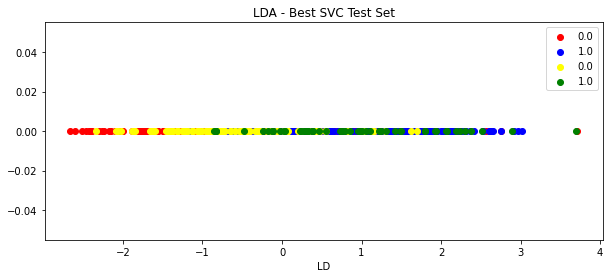

In [54]:
plt.figure(figsize=(10, 4))
for i, j in enumerate(np.unique(y_train)):
    x_plt = X_train_lda[y_train == j, 0]
    y_plt = np.zeros_like(x_plt)
    plt.scatter(x_plt, y_plt, c = ['red', 'blue'][i], label = j)
for i, j in enumerate(np.unique(y_test)):
    x_plt = X_test_lda[y_test == j, 0]
    y_plt = np.zeros_like(x_plt)
    plt.scatter(x_plt, y_plt, c = ['yellow', 'green'][i], label = j)
plt.title('LDA - Best SVC Test Set')
plt.xlabel('LD')
plt.legend()
plt.savefig('lda_best_svc_test_1')
plt.show()

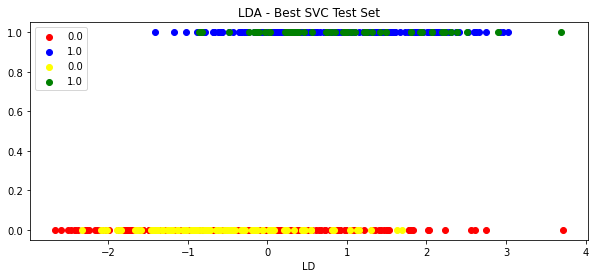

In [55]:
plt.figure(figsize=(10, 4))
for i, j in enumerate(np.unique(y_train)):
    x_plt = X_train_lda[y_train == j, 0]
    y_plt = np.zeros_like(x_plt) + j
    plt.scatter(x_plt, y_plt, c = ['red', 'blue'][i], label = j)
for i, j in enumerate(np.unique(y_test)):
    x_plt = X_test_lda[y_test == j, 0]
    y_plt = np.zeros_like(x_plt) + j
    plt.scatter(x_plt, y_plt, c = ['yellow', 'green'][i], label = j)
plt.title('LDA - Best SVC Test Set')
plt.xlabel('LD')
plt.legend()
plt.savefig('lda_best_svc_test_2')
plt.show()

# Q6

In [56]:
print(f'Test Accuracy after PCA: {acc_pca}')
print(f'Test Accuracy after LDA: {acc_lda}')

Test Accuracy after PCA: 78.57143
Test Accuracy after LDA: 80.51948


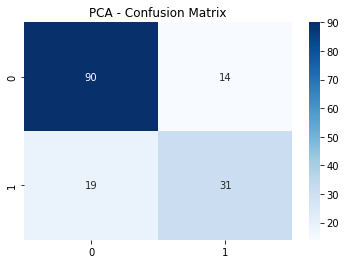

In [57]:
labels = [0, 1]
sns.heatmap(cm_pca, xticklabels=labels, yticklabels=labels, 
            annot=True, fmt="d", cmap = 'Blues')
plt.title("PCA - Confusion Matrix")
plt.savefig('cm_pca')
plt.show()

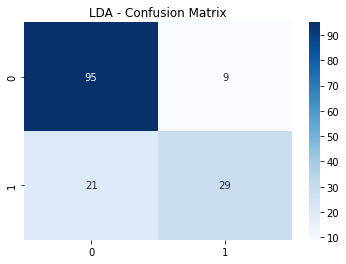

In [58]:
labels = [0, 1]
sns.heatmap(cm_lda, xticklabels=labels, yticklabels=labels, 
            annot=True, fmt="d", cmap = 'Blues')
plt.title("LDA - Confusion Matrix")
plt.savefig('cm_lda')
plt.show()

In [59]:
x = [i for i in range(len(y_test))]

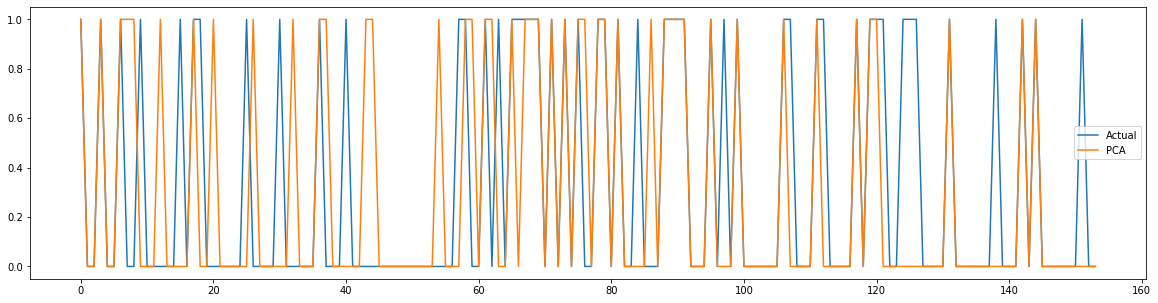

In [60]:
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(x, y_test, label='Actual')
plt.plot(x, y_pred_test_pca, label='PCA')
plt.legend()
plt.savefig('comparison_pca.png')
plt.show()

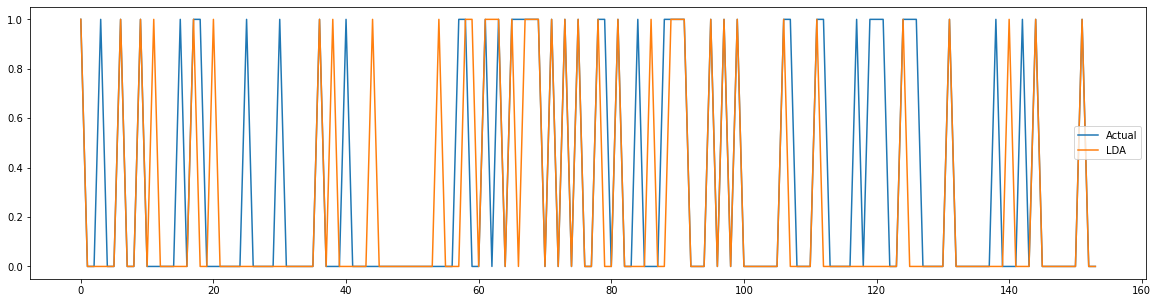

In [61]:
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(x, y_test, label='Actual')
plt.plot(x, y_pred_test_lda, label='LDA')
plt.legend()
plt.savefig('comparison_lda.png')
plt.show()

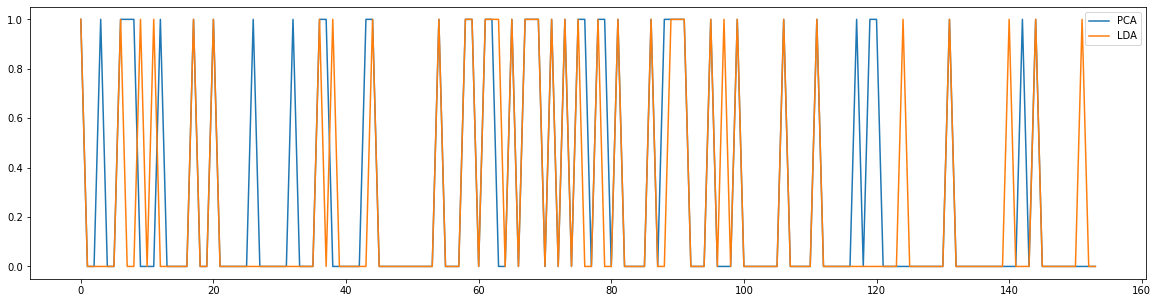

In [62]:
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(x, y_pred_test_pca, label='PCA')
plt.plot(x, y_pred_test_lda, label='LDA')
plt.legend()
plt.savefig('comparison_pca_lda.png')
plt.show()